In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mplsoccer import Pitch, Sbopen

In [2]:
parser = Sbopen()
df = parser.event(69301)[0]
passes = df[(df['type_name'] == 'Pass') & (df['sub_type_name'] != 'Throw-in')].set_index('id')
passes.head()

,index,period,timestamp,minute,second,possession,duration,match_id,type_id,type_name,...,block_deflection,pass_cut_back,bad_behaviour_card_id,bad_behaviour_card_name,pass_no_touch,block_save_block,foul_committed_advantage,foul_won_advantage,foul_committed_card_id,foul_committed_card_name
id,,,,,,,,,,,,,,,,,,,,,
760528a6-2de2-427f-9795-b2b19819ef1f,5,1,00:00:00.140000,0,0,2,0.168730,69301,30,Pass,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ecec23b8-f03d-4bee-80df-9fabec558187,9,1,00:00:05.143000,0,5,2,1.173625,69301,30,Pass,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bdedb943-ddac-42ab-bc8b-756faa49d9e6,12,1,00:00:07.844000,0,7,2,1.019100,69301,30,Pass,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
456a1ae6-1fe8-4ffc-952b-152a7f89e1d2,15,1,00:00:10.586000,0,10,2,0.700000,69301,30,Pass,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
a8d0155f-260c-4470-b842-b474ea58ffa7,19,1,00:00:11.326000,0,11,2,4.150000,69301,30,Pass,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


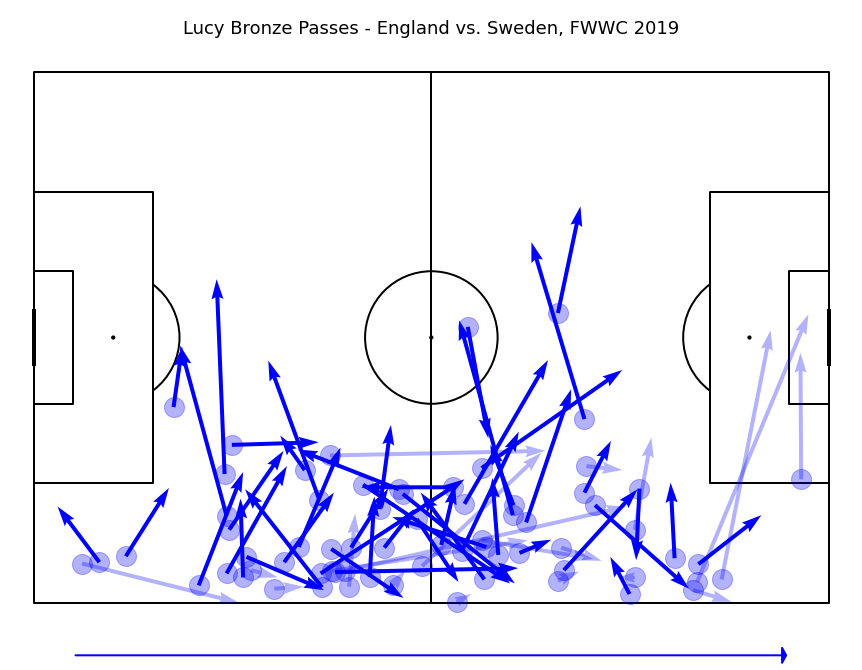

In [3]:
df_pass = passes[passes.player_name=='Lucy Bronze']
pitch = Pitch(line_color='black')
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)

for i, j in df_pass.iterrows():
    #make circle
        if j['outcome_name']=='Incomplete' or j['outcome_name']=='Out':
            pitch.scatter(j.x, j.y, alpha = .3, s = 400, color = "blue", ax=ax['pitch'])
            pitch.arrows(j.x, j.y,
                         j.end_x, j.end_y, lw=1,
                        zorder=1, ax=ax['pitch'],color='blue',alpha=.3)
        elif j['outcome_name']=='Assist':
            pitch.scatter(j.x, j.y, alpha = .3, s = 400, color = "green", ax=ax['pitch'])
            pitch.arrows(j.x, j.y,
                         j.end_x, j.end_y, lw=1,
                        zorder=1, ax=ax['pitch'],color='green',alpha=.3)
        else:
            pitch.scatter(j.x, j.y, alpha = .3, s = 400, color = "blue", ax=ax['pitch'])
            pitch.arrows(j.x, j.y,
                         j.end_x, j.end_y, lw=1,
                        zorder=1, ax=ax['pitch'],color='blue',alpha=1)
            
plt.annotate('', xy=(0.95, -0.01), xycoords='axes fraction', xytext=(0.05, -0.01), 
            arrowprops=dict(arrowstyle='-|>, head_width=0.75', color='blue',lw=2))
fig.suptitle('{} Passes - England vs. Sweden, FWWC 2019'.format(df_pass.player_name.values[0]),fontsize=18)
plt.show();

### Plotting Different Charts in the same Figure

In [4]:
df_eng = passes[passes.team_name.str.contains('England')]
names = df_eng.player_name.unique()
names

array(['Ellen White', 'Francesca Kirby', 'Lucy Bronze', 'Nikita Parris',
       'Jill Scott', 'Jade Moore', 'Bethany Mead', 'Alex Greenwood',
       'Carly Mitchell Telford', 'Abbie McManus', 'Stephanie Houghton',
       'Jodie Taylor', 'Karen Julia Carney', 'Rachel Daly'], dtype=object)

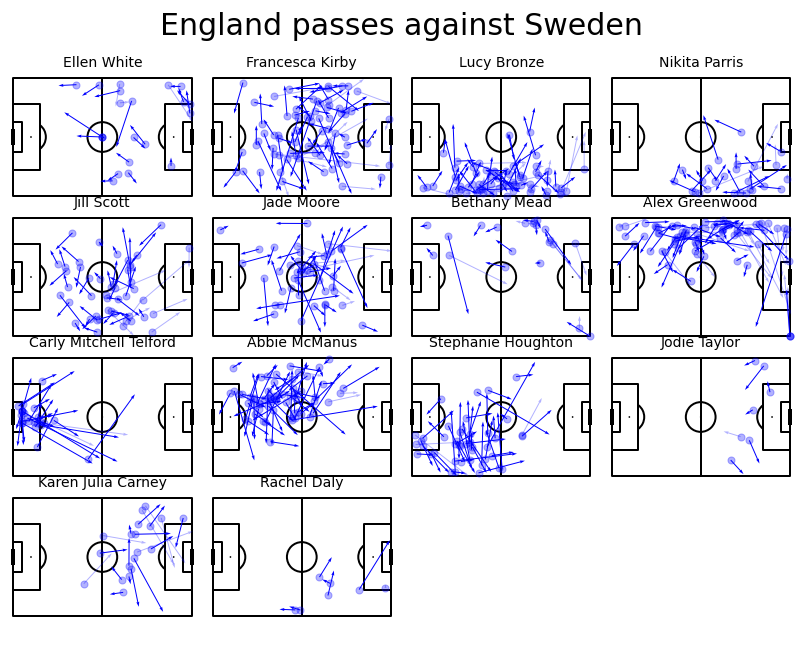

In [5]:
# Siendo 14 jugadoras, nos valdrá un grid de 4x4

pitch = Pitch(line_color='black')
fig, axs = pitch.grid(ncols = 4, nrows = 4, grid_height=0.85, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0.04, endnote_space=0.01)

for name, ax in zip(names,axs['pitch'].flat[:len(names)]):
    ax.text(60, -10, name,
            ha='center', va='center', fontsize=14)
    df_player = df_eng[df_eng.player_name==name]
    
    for i,j in df_player.iterrows():
        if j['outcome_name']=='Incomplete' or j['outcome_name']=='Out':
            pitch.scatter(j.x, j.y, alpha = .3, s = 50, color = "blue", ax=ax)
            pitch.arrows(j.x, j.y,
                             j.end_x, j.end_y,
                            width=1, ax=ax,color='blue',alpha=.3)
        else:
            pitch.scatter(j.x, j.y, alpha = .3, s = 50, color = "blue", ax=ax)
            pitch.arrows(j.x, j.y,
                             j.end_x, j.end_y, width=1,
                             ax=ax,color='blue',alpha=1)

for ax in axs['pitch'][-1, 16 - len(names):]:
    ax.remove()
    
axs['title'].text(0.5, 0.5, 'England passes against Sweden', ha='center', va='center', fontsize=30)
plt.show()